In [2]:
import numpy as np
import matplotlib.pyplot as plt

def farthest_point_sample(xyz, npoint): 

    """
    Input:
        xyz: pointcloud data, [B, N, 3]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """

    xyz = xyz.transpose(0,2,1)
    print(xyz,xyz.shape)
    B, N, C = xyz.shape
    print(B,N,C)
    
    centroids = np.zeros((B, npoint))    # 采样点矩阵（B, npoint）
    print(centroids)
    distance = np.ones((B, N)) * 1e10                       # 采样点到所有点距离（B, N）
    print(distance)
    

    batch_indices = np.arange(B)        # batch_size 数组
    
    barycenter = np.sum((xyz), 1)                                    #计算重心坐标 及 距离重心最远的点
    print(barycenter)
    barycenter = barycenter/xyz.shape[1]
    print(barycenter)
    barycenter = barycenter.reshape(B, 1, C)   #numpy中的reshape相当于torch中的view
    print(barycenter)

    dist = np.sum((xyz - barycenter) ** 2, -1)
    farthest = np.argmax(dist,1)                                     #将距离重心最远的点作为第一个点，这里跟torch.max不一样

    for i in range(npoint):
        print("-------------------------------------------------------")
        print("The %d farthest pts %s " % (i, farthest))
        centroids[:, i] = farthest                                      # 更新第i个最远点
        centroid = xyz[batch_indices, farthest, :].reshape(B, 1, C)        # 取出这个最远点的xyz坐标
        dist = np.sum((xyz - centroid) ** 2, -1)                     # 计算点集中的所有点到这个最远点的欧式距离，-1消掉了xyz那个维度
        print("dist    : ", dist)
        mask = dist < distance
        print("mask %i : %s" % (i,mask))
        distance[mask] = dist[mask]                                     # 更新distance，记录样本中每个点距离所有已出现的采样点（已采样集合中的点）的最小距离
        print("distance: ", distance)

        farthest = np.argmax(distance, -1)                           # 返回最远点索引
 
    return centroids

In [17]:

sim_data = np.array([[np.arange(10)]]) 
print(sim_data)
centroids = farthest_point_sample(sim_data, 5).astype(int)
print("Sampled pts: ", centroids)

[[[0 1 2 3 4 5 6 7 8 9]]]
[[[0]
  [1]
  [2]
  [3]
  [4]
  [5]
  [6]
  [7]
  [8]
  [9]]] (1, 10, 1)
1 10 1
[[0. 0. 0. 0. 0.]]
[[1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10]]
[[45]]
[[4.5]]
[[[4.5]]]
-------------------------------------------------------
The 0 farthest pts [0] 
dist    :  [[ 0  1  4  9 16 25 36 49 64 81]]
mask 0 : [[ True  True  True  True  True  True  True  True  True  True]]
distance:  [[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]]
-------------------------------------------------------
The 1 farthest pts [9] 
dist    :  [[81 64 49 36 25 16  9  4  1  0]]
mask 1 : [[False False False False False  True  True  True  True  True]]
distance:  [[ 0.  1.  4.  9. 16. 16.  9.  4.  1.  0.]]
-------------------------------------------------------
The 2 farthest pts [4] 
dist    :  [[16  9  4  1  0  1  4  9 16 25]]
mask 2 : [[False False False  True  True  True  True False False False]]
distance:  [[0. 1. 4. 1. 0. 1. 4. 4. 1. 0.]]
---------------------------

In [11]:
print(np.zeros((3,1)))

[[0.]
 [0.]
 [0.]]


In [1]:
if __name__ == '__main__':
    #二维采样例子
    x, y= np.mgrid[100:250:15, 200:350:15]
    xy = np.array([x.reshape(1,-1), y.reshape(1,-1)]) 
    xy = xy.transpose(1,0,2)
    sim_data = xy
    centroids = farthest_point_sample(sim_data, 16).astype(int)
    print("Sampled pts: ", centroids)
    print(centroids.shape)
    plt.scatter(sim_data[0,0,:],sim_data[0,1,:])
    for i in range(centroids.shape[1]):
        print(sim_data[0,:,centroids[i]])
        plt.scatter(sim_data[0,0,centroids[i]],sim_data[0,1,centroids[i]])

NameError: name 'np' is not defined

In [15]:
import torch
from torch_geometric.nn import fps
import torch_cluster

x = torch.tensor([[-1.0, -1.0], [-1.0, 1.0], [1.0, -1.0], [1.0, 1.0]])
batch = torch.tensor([0, 0, 0, 0])
index = fps(x, batch, ratio=0.5)
print(index)

tensor([3, 0])


In [1]:
import torch
B = torch.zeros(3,4)
A = torch.arange(3)
C = torch.tensor([4, 0, 6])
print(A,C)

tensor([0, 1, 2]) tensor([4, 0, 6])


In [11]:
D = torch.zeros(3,4)
E = torch.zeros(4,4)
print(E)
print(D)
result = torch.cat((D, E), dim=0)
print(result)


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [14]:
mask = A < C
print(A[mask], C[mask])

tensor([0, 2])


In [9]:
import pandas as pd
list = {"a":[1,2], "b": [3,4]}
df = pd.DataFrame(list)
df[df["b"] == 3]["a"][0]

1

In [1]:
def func():
    return 1,2,3

a,_,b = func()
print(a,b)

1 3


[[1 1]
 [2 0]]


<AxesSubplot: >

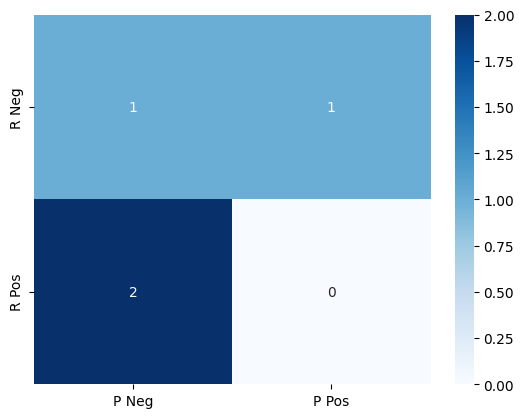

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix([1,0,1,0], [0,1,0,0])
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["P Neg","P Pos"], yticklabels=["R Neg","R Pos"])

<AxesSubplot: >

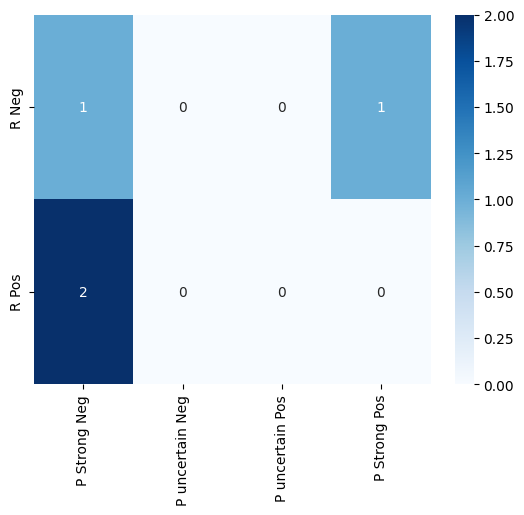

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
real = [1,0,1,0]
pred = [0,1,0,0]

def dim4_cm (real, pred):

    cm = [[0,0,0,0],[0,0,0,0]]
    for i in range(len(pred)):
        pos = 0
        if pred[i] < 0.25:
            pos = 0
        elif 0.25 <= pred[i] < 0.5:
            pos = 1
        elif 0.8 > pred[i] >= 0.5:
            pos = 2
        elif pred[i] >= 0.8:
            pos = 3
            
        if real[i] == 0:

            cm[0][pos] += 1
        else:
            cm[1][pos] += 1
    return cm
        

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["P Strong Neg","P uncertain Neg","P uncertain Pos","P Strong Pos"], yticklabels=["R Neg","R Pos",])